<a href="https://colab.research.google.com/github/metahwi/MachineLearning/blob/main/Kernel%20and%20Histogram%20Density%20Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kernel and histogram density estimation

This notebook aims to introduce probability density estimation using kernel and histogram density estimators.

## Kernel Density Estimation (KDE)

Kernel Density Estimation (KDE) is a non-parametric method used to estimate the probability density function (PDF) of a random variable based on a set of observed data points. The core idea behind KDE is to place a smooth kernel function at each data point and then sum these functions to create a continuous estimate of the underlying distribution.

The kernel density estimate $\hat{p}(x)$ at a data point $x$ is computed as:

$$
 \hat{p}(x) = \frac{1}{n h} \sum_{i=1}^{n} K\left(\frac{x - x_i}{h}\right)
$$

where $n$ denotes the total number of data points, $h$ is the width of the kernel, and $x_i$ are the observed data points.

The kernel density estimate is a continuous function that approximates the underlying probability density, offering a more flexible and nuanced representation than discrete methods such as histograms. The choice of kernel and bandwidth depends on the characteristics of the data and the goals of the analysis.

## Histogram Density Estimation

Histogram Density Estimation is a method used to estimate the probability density function (PDF) of a random variable based on observed data by dividing the data range into bins and counting the frequency of observations within each bin. The estimated density is obtained by normalizing the histogram such that the area under the curve sums to 1.

Mathematically, the histogram density estimate $\hat{p}(x)$ at a data point $x$ is computed as:

$$
 \hat{p}(x) = \frac{n_i}{N \Delta_i} . 1_{x \in \textrm{bin}_i}
$$

where $N$ is the total number of points and $n_i$ represents the number of points in each bin. $\Delta$ denotes the bin width, typically same for all bins in the histogram.

## Probability Density Estimation in Sklearn with Gaussian Distributions

Let's start gaining practice with the probability density estimators using the Scikit-learn library. We will define a probability distribution which is a composition of two Gaussian distributions. Let's implement the Gaussian mixture probability distribution functions.

Text(0, 0.5, 'Density')

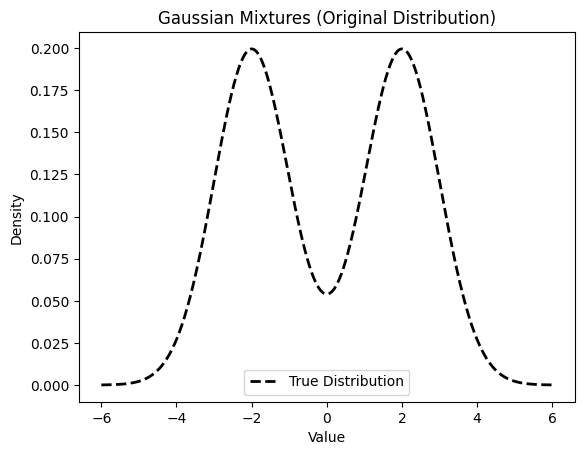

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

# Define Gaussian parameters
mean1 = -2
mean2 = 2
scale1 = 1
scale2 = 1

# Generate a synthetic dataset with two normal distributions
np.random.seed(42)
data = np.concatenate([np.random.normal(mean1, scale1, 300), np.random.normal(mean2, scale2, 200)])

# Create a range of values for which to plot the densities
x_vals = np.linspace(-6, 6, 1000)[:, None]

# Plot the true underlying distribution
original_dist = 0.5 * norm.pdf(x_vals[:, 0], loc=mean1, scale=scale1) + 0.5 * norm.pdf(x_vals[:, 0], loc=mean2, scale=scale2)
plt.plot(x_vals[:, 0], original_dist,
         color='black', linestyle='dashed', lw=2)
plt.title('Gaussian Mixtures (Original Distribution)')
plt.legend(['True Distribution'])
plt.xlabel('Value')
plt.ylabel('Density')

We can define a kernel density estimator for predicting the original probability distribution. We will use a Gaussian kernel function and a bandwith of 0.75.

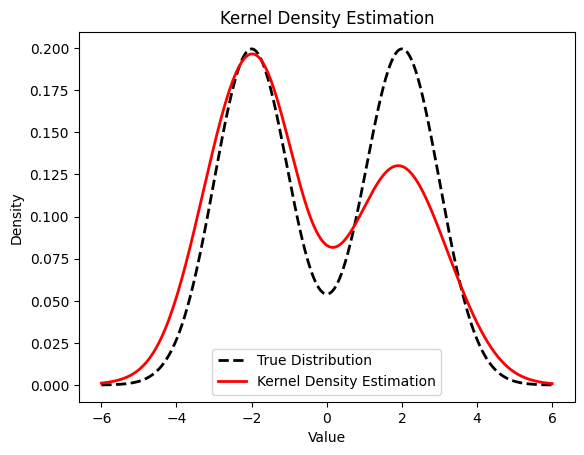

In [ ]:
# Fit a kernel density estimation (KDE) model
kde = KernelDensity(bandwidth=0.75, kernel='gaussian')
kde.fit(data[:, None])

# Evaluate the KDE on the x values
log_dens = kde.score_samples(x_vals)

# Plot the KDE
plt.plot(x_vals[:, 0], original_dist,
         color='black', linestyle='dashed', lw=2)
plt.plot(x_vals[:, 0], np.exp(log_dens), color='red', lw=2)
plt.title('Kernel Density Estimation')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend(['True Distribution', 'Kernel Density Estimation'])
plt.show()

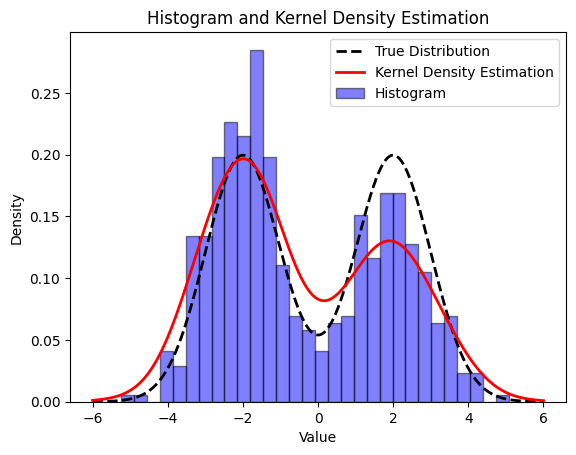

In [ ]:
# Plot the histogram of the synthetic dataset
plt.plot(x_vals[:, 0], original_dist,
         color='black', linestyle='dashed', lw=2)
plt.plot(x_vals[:, 0], np.exp(log_dens), color='red', lw=2)
plt.hist(data, bins=30, density=True, alpha=0.5, color='blue', edgecolor='black')

plt.title('Histogram and Kernel Density Estimation')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend(['True Distribution', 'Kernel Density Estimation', 'Histogram'])
plt.show()

Let's repeat the density estimation to choose the right properties of the estimator functions.

- Kernel bandwidth in {0.1, 0.5, 0.9}
- Histogram bins of {5, 25, 50}

individually. Observe the outcome of the fitted probability curves and compare the results.

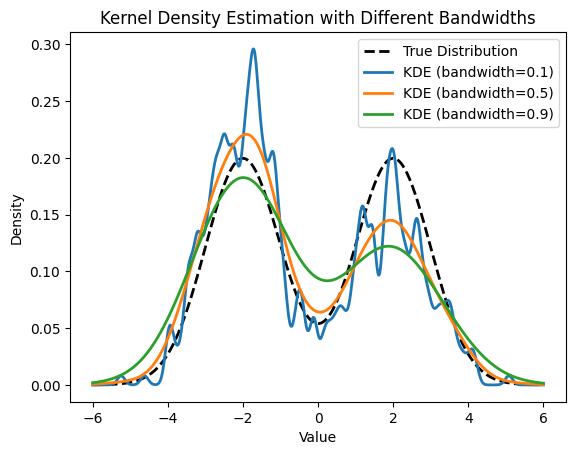

In [ ]:
mean1, mean2 = -2, 2
scale1, scale2 = 1, 1

np.random.seed(42)
data = np.concatenate([np.random.normal(mean1, scale1, 300), np.random.normal(mean2, scale2, 200)])

x_vals = np.linspace(-6, 6, 1000)[:, None]

original_dist = 0.5 * norm.pdf(x_vals[:, 0], loc=mean1, scale=scale1) + 0.5 * norm.pdf(x_vals[:, 0], loc=mean2, scale=scale2)
plt.plot(x_vals[:, 0], original_dist, color='black', linestyle='dashed', lw=2, label='True Distribution')

# Kernel Bandwidths to try
bandwidths = [0.1, 0.5, 0.9]

for bw in bandwidths:
    kde = KernelDensity(bandwidth=bw, kernel='gaussian')
    kde.fit(data[:, None])
    log_dens = kde.score_samples(x_vals)
    plt.plot(x_vals[:, 0], np.exp(log_dens), lw=2, label=f'KDE (bandwidth={bw})')

plt.title('Kernel Density Estimation with Different Bandwidths')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

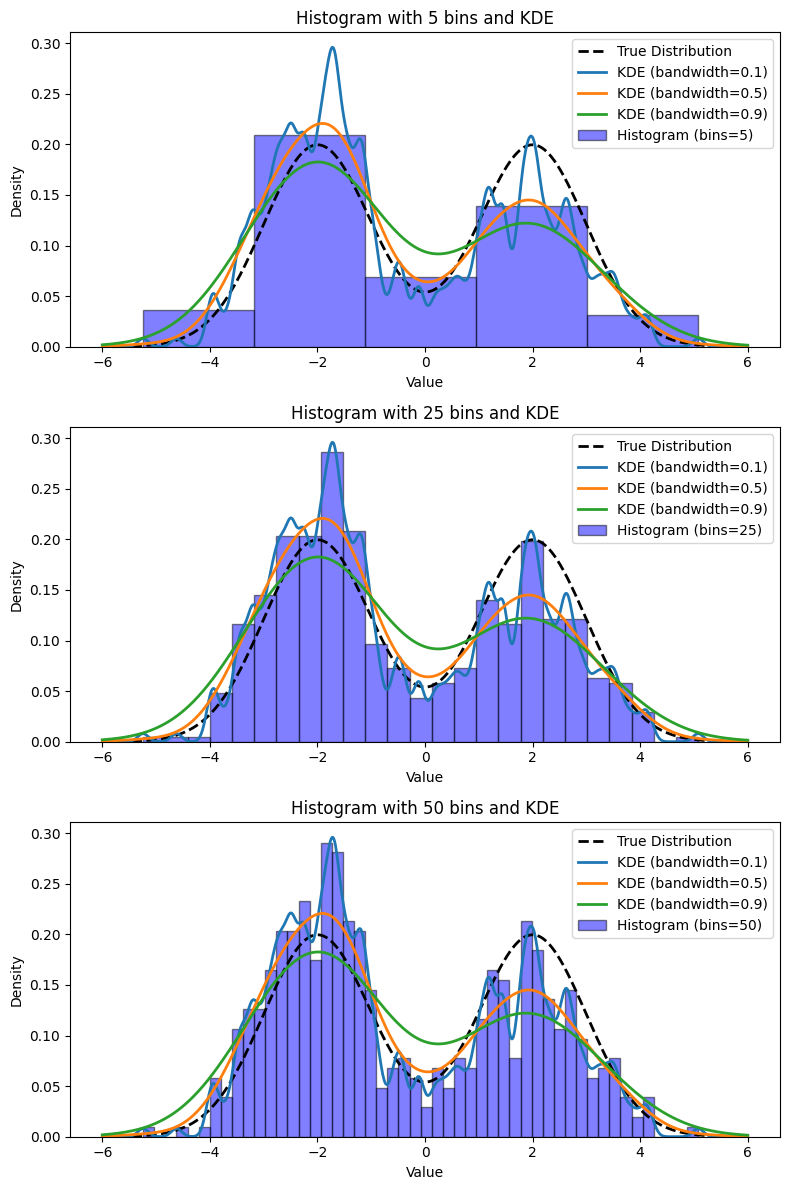

In [ ]:
# Set the histogram bin counts
hist_bins = [5, 25, 50]

# Create subplots
fig, axs = plt.subplots(len(hist_bins), 1, figsize=(8, 12))

# Repeat the KDE plot for each set of histogram bins
for i, num_bins in enumerate(hist_bins):
    # Plot true distribution
    axs[i].plot(x_vals[:, 0], original_dist, color='black', linestyle='dashed', lw=2, label='True Distribution')

    # Plot KDE curves for each bandwidth
    for bw in bandwidths:
        kde = KernelDensity(bandwidth=bw, kernel='gaussian')
        kde.fit(data[:, None])
        log_dens = kde.score_samples(x_vals)
        axs[i].plot(x_vals[:, 0], np.exp(log_dens), lw=2, label=f'KDE (bandwidth={bw})')

    # Plot histogram
    axs[i].hist(data, bins=num_bins, density=True, alpha=0.5, color='blue', edgecolor='black', label=f'Histogram (bins={num_bins})')

    # Set plot title and labels
    axs[i].set_title(f'Histogram with {num_bins} bins and KDE')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Density')

    # Add legend
    axs[i].legend()

plt.tight_layout()
plt.show()


## Different Gaussian Distributions

Eexperiment for two Gaussian distributions with:
- Means of (-1, 1), sizes (300, 200), scales of 2
- Means of (0, 0), sizes (300, 200), scales of 3

Experiment for three Gaussian distributions with:
- Means of (-5, -4, 0), sizes (300, 100, 200) scales of 1


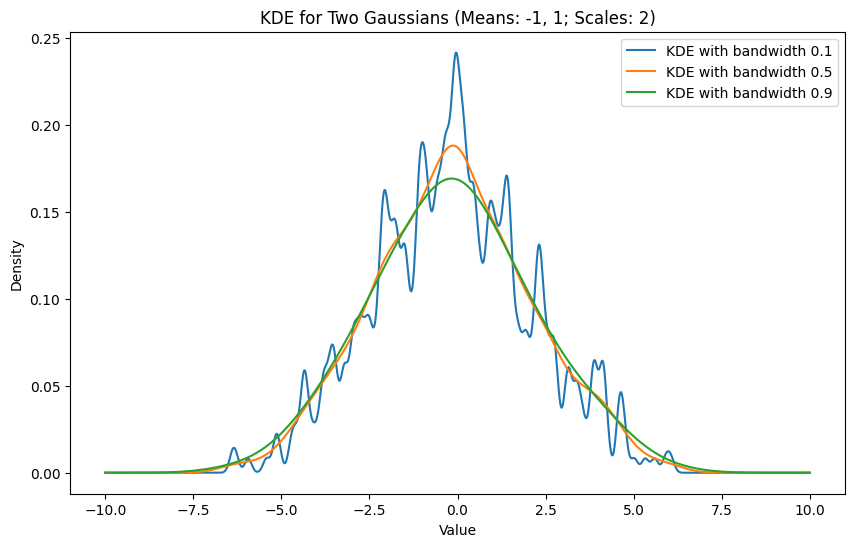

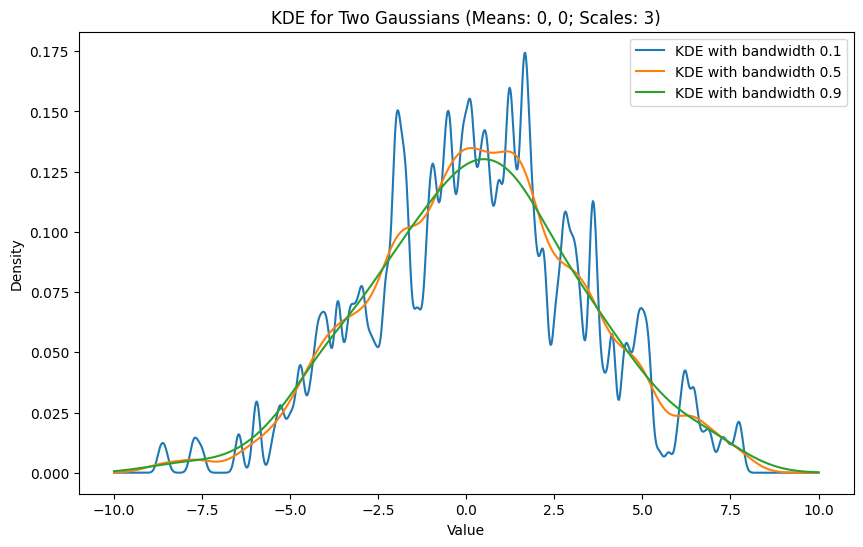

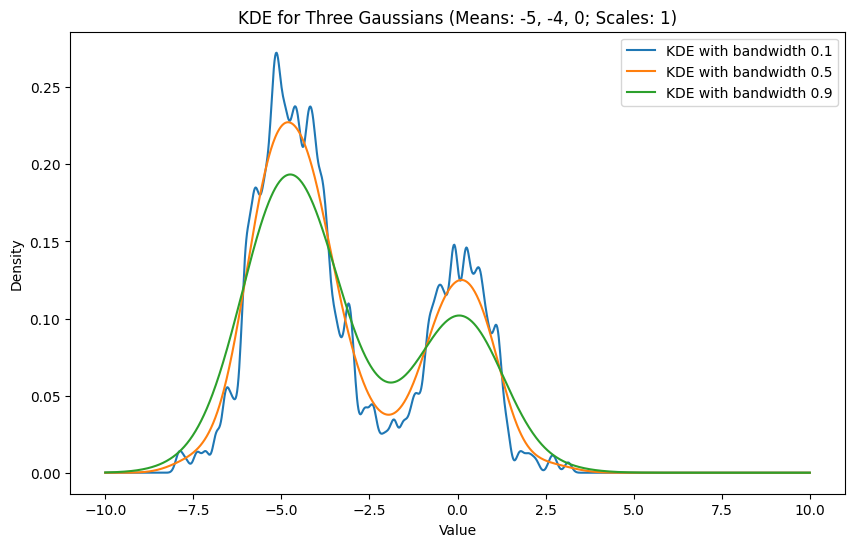

In [ ]:
def perform_kde_and_plot(data, title):
    # Range of values for KDE
    x_vals = np.linspace(-10, 10, 1000)[:, None]

    # Different bandwidths for KDE
    bandwidths = [0.1, 0.5, 0.9]

    plt.figure(figsize=(10, 6))
    for bw in bandwidths:
        kde = KernelDensity(bandwidth=bw, kernel='gaussian')
        kde.fit(data[:, None])
        log_dens = kde.score_samples(x_vals)
        plt.plot(x_vals[:, 0], np.exp(log_dens), label=f'KDE with bandwidth {bw}')

    plt.title(f'KDE for {title}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Experiment 1: Two Gaussian distributions with means of (-1, 1), sizes (300, 200), scales of 2
mean1, mean2 = -1, 1
scale1, scale2 = 2, 2
data1 = np.concatenate([np.random.normal(mean1, scale1, 300), np.random.normal(mean2, scale2, 200)])
perform_kde_and_plot(data1, "Two Gaussians (Means: -1, 1; Scales: 2)")

# Experiment 2: Two Gaussian distributions with means of (0, 0), sizes (300, 200), scales of 3
mean3, mean4 = 0, 0
scale3, scale4 = 3, 3
data2 = np.concatenate([np.random.normal(mean3, scale3, 300), np.random.normal(mean4, scale4, 200)])
perform_kde_and_plot(data2, "Two Gaussians (Means: 0, 0; Scales: 3)")

# Experiment 3: Three Gaussian distributions with means of (-5, -4, 0), sizes (300, 100, 200), scales of 1
mean5, mean6, mean7 = -5, -4, 0
scale5, scale6, scale7 = 1, 1, 1
data3 = np.concatenate([np.random.normal(mean5, scale5, 300), np.random.normal(mean6, scale6, 100), np.random.normal(mean7, scale7, 200)])
perform_kde_and_plot(data3, "Three Gaussians (Means: -5, -4, 0; Scales: 1)")


Defining an Exponential distribution of scale 1.5, size of 200.
Implementing kernel density estimation and histogram density plots for different choices of kernel function (‘gaussian’, ‘tophat’, ‘epanechnikov’, ‘exponential’, ‘linear’, ‘cosine’), smoothing parameter, and histogram bins. Compare the results. Comment on how the bias and variance changes in each choice of parameter.

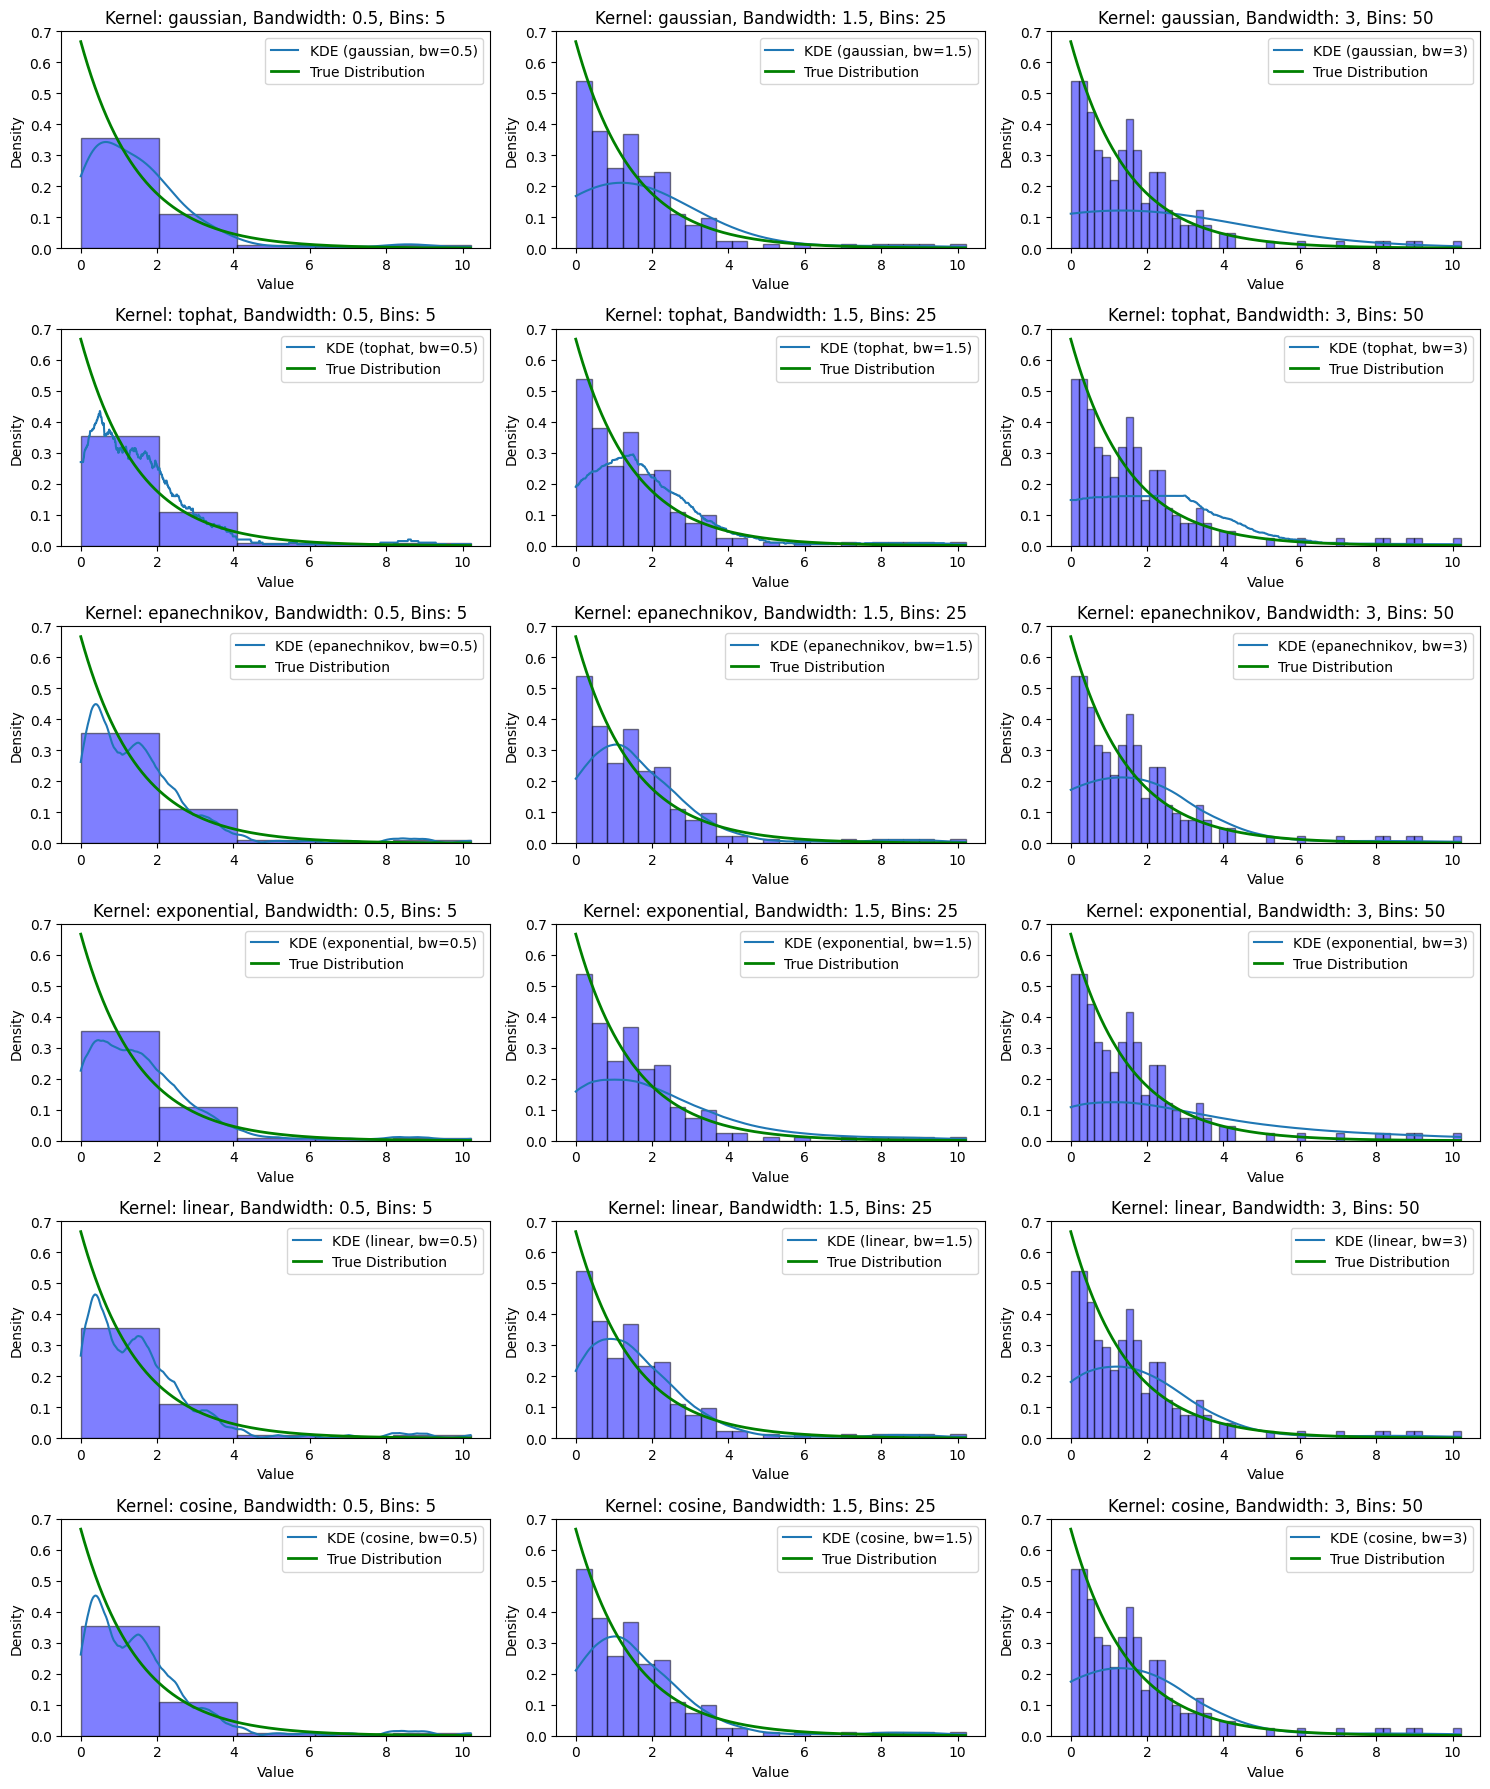

In [ ]:
from scipy.stats import expon
from sklearn.neighbors import KernelDensity

scale = 1.5
size = 200
data = np.random.exponential(scale, size)

x_vals = np.linspace(0, max(data), 1000)[:, None]

true_dist = expon.pdf(x_vals, scale=scale)

# Kernel Functions
kernels = ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']

bandwidths = [0.5, 1.5, 3]

hist_bins = [5, 25, 50]

fig, axs = plt.subplots(len(kernels), len(bandwidths), figsize=(15, 18))

for i, kernel in enumerate(kernels):
    for j, bw in enumerate(bandwidths):
        # KDE with specified kernel and bandwidth
        kde = KernelDensity(bandwidth=bw, kernel=kernel)
        kde.fit(data[:, None])
        log_dens = kde.score_samples(x_vals)
        axs[i, j].plot(x_vals[:, 0], np.exp(log_dens), label=f'KDE ({kernel}, bw={bw})')
        axs[i, j].hist(data, bins=hist_bins[j], density=True, alpha=0.5, color='blue', edgecolor='black')
        axs[i, j].plot(x_vals[:, 0], true_dist, color='green', lw=2, label='True Distribution')
        axs[i, j].set_title(f'Kernel: {kernel}, Bandwidth: {bw}, Bins: {hist_bins[j]}')
        axs[i, j].set_xlabel('Value')
        axs[i, j].set_ylabel('Density')
        axs[i, j].legend()

plt.tight_layout()
plt.show()



The fixed width of the kernel can potentially cause issues.
- In regions of high data density a large value of h will lead to over smoothing and washing out of the structure that otherwise might exist in the data
- On the other hand, reducing h might lead to noisy estimates of the density in parts of the space where the data is sparse.

Thus the optimal choice of h might depend on the part of the space you are in. This issue is addressed with the nearest neighbor methods.

The nearest neighbor method, also known as the k-nearest neighbors (KNN) algorithm, is a simple and widely used supervised machine learning algorithm. It is used for both classification and regression tasks. The basic idea behind the nearest neighbor method is to predict the label or value of a data point by looking at the majority class or average value of its k nearest neighbors in the feature space.

[Nearest neighbors algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html) can be implemented using the Scikit-learn. In your implementation, try defining a kNN to predict the distances between each of the k clusters, and define the kernel bandwidth as the average of those distances. This will allow a more intuitive choice for the bandwidth rather than trial-and-error based tuning.

Prediction based on widths

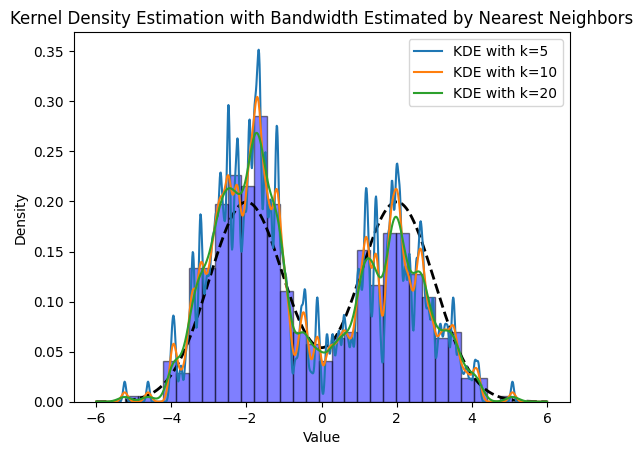

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors, KernelDensity
from scipy.stats import norm

# Define Gaussian parameters for the synthetic dataset
mean1, mean2 = -2, 2
scale1, scale2 = 1, 1

# Generate the synthetic dataset
np.random.seed(42)
data = np.concatenate([np.random.normal(mean1, scale1, 300), np.random.normal(mean2, scale2, 200)])

# Create a range of values for plotting
x_vals = np.linspace(-6, 6, 1000)[:, None]

# Plot the true underlying distribution
original_dist = 0.5 * norm.pdf(x_vals[:, 0], loc=mean1, scale=scale1) + 0.5 * norm.pdf(x_vals[:,0], loc=mean2, scale=scale2)
plt.plot(x_vals[:, 0], original_dist, color='black', linestyle='dashed', lw=2)

# Different values of k for k-nearest neighbors
k_values = [5, 10, 20]

# Implementing dynamic width kernel density estimation for each k value
for k in k_values:
    # Use Nearest neighbors to estimate the bandwidth
    knn = NearestNeighbors(n_neighbors=k)
    knn.fit(data.reshape(-1,1))
    distances, _ = knn.kneighbors(data.reshape(-1,1))
    bandwidth = np.mean(distances[:, -1])

    # Fit a kernel density estimation (KDE) model with the estimated bandwidth
    kde = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
    kde.fit(data.reshape(-1,1))

    # Evaluate the KDE on the x values
    log_dens = kde.score_samples(x_vals)

    # Plot the KDE
    plt.plot(x_vals, np.exp(log_dens), label=f'KDE with k={k}')

# Plot the true underlying distribution (for comparison)
plt.hist(data, bins=30, density=True, alpha=0.5, color='blue', edgecolor='black')

plt.title('Kernel Density Estimation with Bandwidth Estimated by Nearest Neighbors')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()
